In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Declare paths
tradePath = 'https://github.com/omercadopopular/cgoes/raw/refs/heads/master/trade-undergrad/data/API_NE.TRD.GNFS.ZS_DS2_en_excel_v2_38352.xls'
growthPath = 'https://github.com/omercadopopular/cgoes/raw/refs/heads/master/trade-undergrad/data/API_NY.GDP.PCAP.KD.ZG_DS2_en_excel_v2_122434.xls'

In [3]:
# read the trade and growth data from Excel files
trade = pd.read_excel(tradePath, skiprows=3).drop(columns=['Indicator Name', 'Indicator Code'])
growth = pd.read_excel(growthPath, skiprows=3).drop(columns=['Indicator Name', 'Indicator Code'])

trade

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,145.833663,142.239763,143.804296,145.213552,145.343573,124.137267,147.015577,172.884172,169.798283,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.597224,52.891643,52.620341,55.547014,52.609045,50.384053,55.644094,58.642287,56.998583,54.117408
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.709895,51.411716,72.885470,67.584665,NaN
3,Africa Western and Central,AFW,33.023260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.888516,53.370158,52.256822,66.378013,57.829538,65.942029,74.464499,69.691071,67.001793,62.295919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.020442,75.018812,80.410137,86.315085,85.753409,75.608017,98.638430,110.012032,109.951852,114.260393
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.367659,31.081544,42.969905,56.077823,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,46.855497,43.748103,43.352354,44.976138,45.948478,45.516872,42.094375,42.491815,...,56.726676,55.861258,53.535932,54.485545,53.897996,50.759659,56.034714,64.783002,65.180096,61.702598
264,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.865269,73.958561,71.585695,74.888370,68.791205,79.206849,86.208511,69.297315,78.241887,NaN


In [4]:
# collapse from wide to long format for trade data
trade = trade.melt(id_vars=['Country Name', 'Country Code'],
                   var_name='Year', value_name='Trade')
growth = growth.melt(id_vars=['Country Name', 'Country Code'],
                   var_name='Year', value_name='Growth')

trade

,Country Name,Country Code,Year,Trade
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,33.023260
4,Angola,AGO,1960,NaN
...,...,...,...,...
17285,Kosovo,XKX,2024,114.260393
17286,"Yemen, Rep.",YEM,2024,NaN
17287,South Africa,ZAF,2024,61.702598
17288,Zambia,ZMB,2024,NaN


In [5]:
# merge the two dataframes on Country Name, Country Code, and Year
frame = pd.merge(trade, growth, on=['Country Name', 'Country Code', 'Year'])

frame

,Country Name,Country Code,Year,Trade,Growth
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN
3,Africa Western and Central,AFW,1960,33.023260,NaN
4,Angola,AGO,1960,NaN,NaN
...,...,...,...,...,...
17285,Kosovo,XKX,2024,114.260393,15.032549
17286,"Yemen, Rep.",YEM,2024,NaN,NaN
17287,South Africa,ZAF,2024,61.702598,-0.669087
17288,Zambia,ZMB,2024,NaN,1.158387


In [6]:
# drop missing values
frame = frame.dropna(subset=['Trade','Growth'])

frame

,Country Name,Country Code,Year,Trade,Growth
275,Argentina,ARG,1961,11.989892,3.697198
279,Australia,AUS,1961,27.379801,0.463351
282,Burundi,BDI,1961,27.586208,-15.901965
284,Benin,BEN,1961,14.118122,1.451144
285,Burkina Faso,BFA,1961,21.218862,2.550233
...,...,...,...,...,...
17283,World,WLD,2024,56.559581,1.889469
17284,Samoa,WSM,2024,83.131663,8.741783
17285,Kosovo,XKX,2024,114.260393,15.032549
17287,South Africa,ZAF,2024,61.702598,-0.669087


In [7]:
# group by year and compute median trade share
median_trade = (frame.groupby(['Year'])['Trade'].transform('median'))

# create a group label (Above / Below median)
frame['group'] = (frame['Trade'] > median_trade).map({True: 'Above Median', False: 'Below Median'})

frame

C:\Users\cbezerradegoes\AppData\Local\Temp\ipykernel_38348\1127353128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['group'] = (frame['Trade'] > median_trade).map({True: 'Above Median', False: 'Below Median'})


,Country Name,Country Code,Year,Trade,Growth,group
275,Argentina,ARG,1961,11.989892,3.697198,Below Median
279,Australia,AUS,1961,27.379801,0.463351,Below Median
282,Burundi,BDI,1961,27.586208,-15.901965,Above Median
284,Benin,BEN,1961,14.118122,1.451144,Below Median
285,Burkina Faso,BFA,1961,21.218862,2.550233,Below Median
...,...,...,...,...,...,...
17283,World,WLD,2024,56.559581,1.889469,Below Median
17284,Samoa,WSM,2024,83.131663,8.741783,Above Median
17285,Kosovo,XKX,2024,114.260393,15.032549,Above Median
17287,South Africa,ZAF,2024,61.702598,-0.669087,Below Median


In [8]:
# take averages across groups
result = frame.groupby(['Year', 'group'])['Growth'].mean().reset_index()
result

,Year,group,Growth
0,1961,Above Median,0.889462
1,1961,Below Median,0.247250
2,1962,Above Median,3.246927
3,1962,Below Median,1.323454
4,1963,Above Median,2.958503
...,...,...,...
123,2022,Below Median,2.697659
124,2023,Above Median,2.430049
125,2023,Below Median,1.671804
126,2024,Above Median,2.034708


In [9]:
# pivot table (as in excel)
pivot = result.pivot(index='Year',
                     columns='group',
                     values='Growth')
pivot.index = pivot.index.astype(int)
pivot

group,Above Median,Below Median
Year,,
1961,0.889462,0.247250
1962,3.246927,1.323454
1963,2.958503,1.849177
1964,4.004339,4.326294
1965,2.942488,2.806237
...,...,...
2020,-6.254187,-4.504566
2021,5.888876,4.108566
2022,2.848106,2.697659


In [10]:
# calculate difference across groups
pivot['difference'] = pivot['Above Median'] - pivot['Below Median']

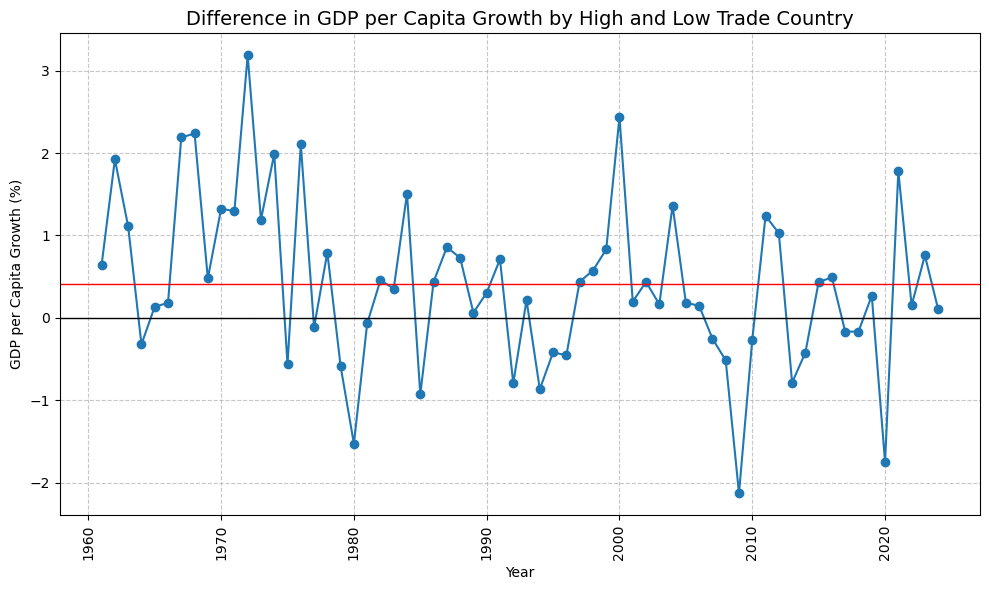

In [11]:
# chart difference
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pivot.index, pivot['difference'], marker='o')
plt.axhline(pivot['difference'].mean(), color='red', linewidth=1)  # zero line for reference

plt.axhline(0, color='black', linewidth=1)  # zero line for reference
plt.title('Difference in GDP per Capita Growth by High and Low Trade Country', fontsize=14)
plt.xlabel('Year')
plt.ylabel('GDP per Capita Growth (%)')
plt.xticks(rotation=90)  # rotate labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()